# Cumulative Histogram Curves

Cumulative Histogram Curves corresponding (CHC) to the rank of the unknown active molecules are plotted. The CHC curves of the most efficient methods stand above the others. The x-axis represents the rank, and the y-axis represents the proportion of cases (i.e., the proportion of scaffold hopping cases, among the 219×2=438 scaffold hopping problems in the Large-Hops benchmark) where the method recovers the unknown active at a rank below the x-axis value.

In [4]:
import csv
import copy
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import re
import seaborn as sns
import sys
from sklearn.preprocessing import KernelCenterer
from datetime import datetime

## 1. Tests for different molecule kernels (MorganFP, 2D_pharmacophore_Gobbi, 2D_pharmacophore_Minimal_features,3D_pharmacophore) et les différents choix de négatifs (algo1, 2, 3)

In [5]:

df = pd.read_csv('/Users/gguichaoua/Dropbox/gwenn/these/Cluster/scaffold_hopping/scaffold_hopping_corrected.csv') 
path = "/Users/gguichaoua/Dropbox/gwenn/these/Cluster/scaffold_hopping/prediction_decoys/"
 

def f(id_t, num,path_decoys):
    
    if os.path.exists(path_decoys + "/decoys_" + id_t):
        os.chdir(path_decoys+ "/decoys_" + id_t)
        nom_t = 'predictions_smiles_{}_test.csv'.format(num)
        df_pred = pd.read_csv(nom_t)
        return (df_pred.index[df_pred["decoys"] == "smiles"+str(num)].tolist())[0]+1
    else : 
        return 0

for kernel_type in ["MorganFP_", "2D_pharmacophore_Gobbi_", "2D_pharmacophore_MinimalFeatures_", "3D_pharmacophore_" ] : 
    for i in range(1, 4):
        df['rank pred smiles_1_'+ kernel_type +str(i)] = list(map(lambda id_t: f(id_t, 0, path + kernel_type +str(i)+"_decoys_chemogenomics_0"), df['id'])) 
        df['rank pred smiles_2_' + kernel_type + str(i)] = list(map(lambda id_t: f(id_t, 1, path + kernel_type +str(i)+ "_decoys_chemogenomics_0"), df['id'])) 

df_0 = df[df["rank pred smiles_1_"+ kernel_type + str(i)]!=0]  # on garde les 87 prédictions
df_0

,id,smiles_1,smiles_2,uniprot_id,rank pred smiles_1_MorganFP_1,rank pred smiles_2_MorganFP_1,rank pred smiles_1_MorganFP_2,rank pred smiles_2_MorganFP_2,rank pred smiles_1_MorganFP_3,rank pred smiles_2_MorganFP_3,...,rank pred smiles_1_2D_pharmacophore_MinimalFeatures_2,rank pred smiles_2_2D_pharmacophore_MinimalFeatures_2,rank pred smiles_1_2D_pharmacophore_MinimalFeatures_3,rank pred smiles_2_2D_pharmacophore_MinimalFeatures_3,rank pred smiles_1_3D_pharmacophore_1,rank pred smiles_2_3D_pharmacophore_1,rank pred smiles_1_3D_pharmacophore_2,rank pred smiles_2_3D_pharmacophore_2,rank pred smiles_1_3D_pharmacophore_3,rank pred smiles_2_3D_pharmacophore_3
174,1efy_2pax,COC1=CC=CC(=C1)C1=NC2=C(N1)C=CC=C2C(N)=O,NC1=CC=C2C(=O)NC(=O)C3=CC=CC1=C23,P26446,1,1,1,1,1,1,...,1,3,1,3,1,1,1,1,1,1
175,3kb7_4a4l,COc1ccc(N2CCN(C)CC2)cc1NC1=NC=C2CC[C@@H]3C(C(N...,CN1CCN(c2ccc(OC(F)(F)F)c(Nc3nccc(-c4cc(C(N)=O)...,P53350,1,1,1,1,1,1,...,174,21,235,120,229,1,254,1,276,1
176,3ce0_4l7l,CN(C)CC(=O)NC1=CC2=C(NC(=O)C3=CC=CC=C23)C=C1,O=C(CCc1nc2ccccc2c(=O)[nH]1)N[C@H](CO)Cc1ccccc1,Q9Y6F1,118,55,120,53,127,47,...,349,187,321,201,186,171,220,210,200,198
177,2i0v_2i1m,CC1=NOC(=C1)C1=C(C2=CC=CC=C2)C2=C(NC1=O)C=CC(C...,CC1CCN(CC1)C1=CC=C(CO)C=C1NC(=O)C1=CC=C(O1)C#N,P07333,348,399,342,392,323,399,...,132,82,232,36,172,347,196,349,214,354
180,1vjy_5qik,Cc1cccc(-c2n[nH]cc2-c2ccc3ncccc3n2)n1,CC(=O)Nc1cc(-c2[nH]c3c(c2-c2ccc(F)nc2)C(=O)NCC...,P36897,109,60,71,83,78,70,...,221,242,30,217,47,9,52,78,19,25
184,3iok_4c61,C[C@H](Nc1cc(-c2c(N)nn3cccnc23)ncn1)c1ccc(F)cc1,Cc1csc2c(Nc3cn(C)cn3)nc(N[C@@H](C)c3ncc(F)cn3)...,O60674,50,12,37,11,26,35,...,4,106,6,312,2,3,20,8,2,8
189,3vw6_6e2n,CC(C)(C)c1ccc(C(=O)Nc2cn3cc(-n4ccnc4)ccc3n2)cc1,O=C(Nc1cccc(-c2nncn2C2CC2)c1)c1cc(-c2cccnc2)ccn1,Q99683,353,95,360,106,352,116,...,133,149,280,75,255,55,177,40,232,112
190,4obp_4obq,Nc1ncnc2ccc(-c3ccnc(F)c3)nc12,Nc1ncnc2ccc(-c3cc(F)cc(NC(=O)CN4CCCC4)c3)cc12,O95819,41,18,55,20,41,25,...,8,7,11,25,26,33,19,45,15,58
192,3uzp_4kbk,Nc1nccc(-c2c(-c3ccc(F)cc3)ncn2C2CCCCC2)n1,Cn1cc(-c2ccnc([C@H]3COCCN3)c2)c(-c2ccc(F)cc2)n1,P48730,14,21,10,21,36,13,...,34,77,57,27,85,60,99,83,165,86
194,3ikd_3kad,O=C(N[C@@H](CO[P+]([O-])(O)O)Cc1ccccc1)c1cc2cc...,O=C(CCc1ccccc1)N[C@H](Cc1nc2ccccc2[nH]1)C(=O)O,Q13526,31,7,33,8,29,7,...,213,220,274,234,263,41,206,119,200,67


# Curves for each algorithm (1, 2, 3 : depen on the negative choice)

In [8]:
algo = "1"
L = [0,0,0,0]
kernel_type_list = ["MorganFP_", "2D_pharmacophore_Gobbi_", "2D_pharmacophore_MinimalFeatures_", "3D_pharmacophore_" ]
for i in range(4)  : 
    L[i] = np.concatenate((np.array(df_0["rank pred smiles_1_"+ kernel_type_list[i] + algo]), np.array(df_0["rank pred smiles_2_"+ kernel_type_list[i] + algo])))

AUC normalized for kernel MorganFP: 0.75
[0.4 0.4]
AUC normalized for kernel 2D_pharmacophore_Gobbi: 0.75
[0.36666667 0.36666667]
AUC normalized for kernel 2D_pharmacophore_MinimalFeatures: 0.71
[0.26666667 0.26666667]
AUC normalized for kernel 3D_pharmacophore: 0.78
[0.26666667 0.26666667]


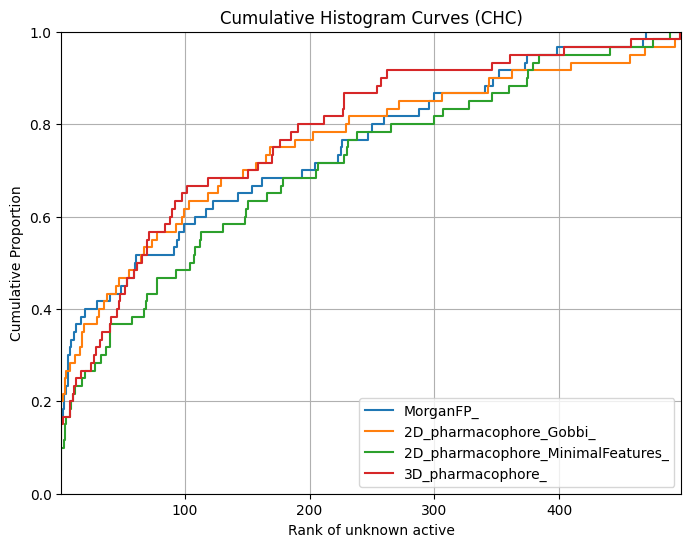

In [9]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))



for i in range(4)  : 
    # Create cumulative histograms for each method
    hist_method, bin_edges = np.histogram(L[i], bins=np.arange(0, 500), density=True)
    cumulative_hist_method = np.cumsum(hist_method)
    # Plot cumulative histogram curves for each method
    plt.plot(bin_edges[:-1], cumulative_hist_method, drawstyle='steps', label=kernel_type_list[i])
    auc_method = np.trapz(cumulative_hist_method, dx=1)
    normalized_auc_method = auc_method / 500
    print(f"AUC normalized for kernel {kernel_type_list[i][:-1]}: {normalized_auc_method:0.2f}" )

    # Calculate percentage of ranks in the top 5% for each method
    print(cumulative_hist_method[24:26])
    
    


plt.xlabel('Rank of unknown active')
plt.ylabel('Cumulative Proportion')
plt.title('Cumulative Histogram Curves (CHC)')
plt.legend()
plt.grid(True)
plt.ylim(0, 1)
plt.xlim(1, max(bin_edges[:-1]))
plt.show()

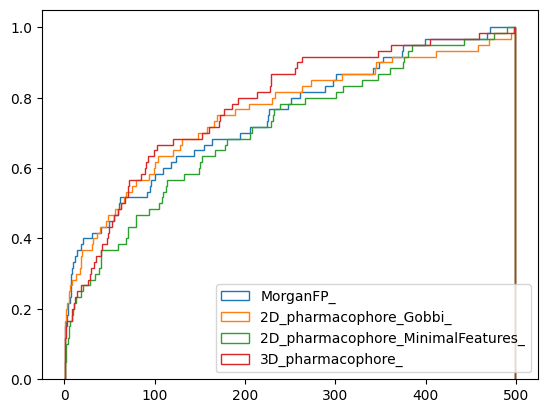

In [4]:
# seulement pour algo 1
L = [0,0,0,0]
kernel_type_list = ["MorganFP_", "2D_pharmacophore_Gobbi_", "2D_pharmacophore_MinimalFeatures_", "3D_pharmacophore_" ]
for i in range(4)  : 
    L[i] = np.concatenate((np.array(df_0["rank pred smiles_1_"+ kernel_type_list[i] + "1"]), np.array(df_0["rank pred smiles_2_"+ kernel_type_list[i] + "1"])))
    plt.hist(L[i],bins = np.arange(0,500),density=True, cumulative = True, histtype='step', label = kernel_type_list[i])
plt.legend(loc = "lower right")


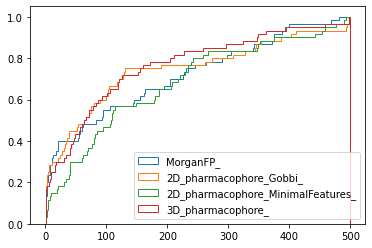

In [28]:
# seulement pour algo 2
L = [0,0,0,0]
kernel_type_list = ["MorganFP_", "2D_pharmacophore_Gobbi_", "2D_pharmacophore_MinimalFeatures_", "3D_pharmacophore_" ]
for i in range(4)  : 
    L[i] = np.concatenate((np.array(df_0["rank pred smiles_2_"+ kernel_type_list[i] + "1"]), np.array(df_0["rank pred smiles_2_"+ kernel_type_list[i] + "2"])))
    plt.hist(L[i],bins = np.arange(0,500),density=True, cumulative = True, histtype='step', label = kernel_type_list[i])
plt.legend(loc = "lower right")

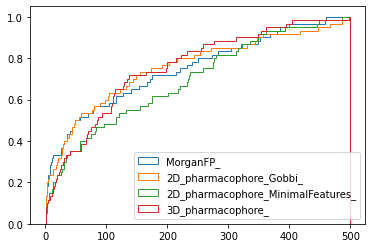

In [27]:
# seulement pour algo 3
L = [0,0,0,0]
kernel_type_list = ["MorganFP_", "2D_pharmacophore_Gobbi_", "2D_pharmacophore_MinimalFeatures_", "3D_pharmacophore_" ]
for i in range(4)  : 
    L[i] = np.concatenate((np.array(df_0["rank pred smiles_1_"+ kernel_type_list[i] + "3"]), np.array(df_0["rank pred smiles_2_"+ kernel_type_list[i] + "3"])))
    plt.hist(L[i],bins = np.arange(0,500),density=True, cumulative = True, histtype='step', label = kernel_type_list[i])
plt.legend(loc = "lower right")

## 2. Cumulative Histogram Curves for some examples

In [13]:
df = pd.read_csv('/Users/gguichaoua/Dropbox/gwenn/these/Cluster/scaffold_hopping/scaffold_hopping_corrected.csv') 
path = "/Users/gguichaoua/Dropbox/gwenn/these/Cluster/scaffold_hopping/prediction_decoys_SVM_Features_pytorch/decoys_chemogenomics_petits"
 

def f(id_t, num,path_decoys):
    
    if os.path.exists(path_decoys + "/decoys_" + id_t):
        os.chdir(path_decoys+ "/decoys_" + id_t)
        nom_t = 'predictions_smiles_{}_test.csv'.format(num)
        df_pred = pd.read_csv(nom_t)
        return (df_pred.index[df_pred["decoys"] == "smiles"+str(num)].tolist())[0]+1
    else : 
        return 0

    
df['rank pred smiles_1_'] = list(map(lambda id_t: f(id_t, 0, path), df['id'])) 
df['rank pred smiles_2_'] = list(map(lambda id_t: f(id_t, 1, path), df['id'])) 

#df_svm = df[df["rank pred smiles_1_"+ kernel_type + str(i)]!=0]  # on garde les 87 prédictions
df_svm = df[df["rank pred smiles_1_"]!=0]  # on garde les 87 prédictions
df_svm

,id,smiles_1,smiles_2,uniprot_id,rank pred smiles_1_,rank pred smiles_2_
14,1bl7_1zzl,NC1=NC=CC(=N1)C1=C(N=CN1C1CCNCC1)C1=CC=C(F)C=C1,CC(C)C1=NN=C2C=CC(=CN12)C1=C(N=CO1)C1=CC=C(F)C=C1,Q16539,214,140
34,3oc0_3vjl,CCCC[C@H]1CN2CCc3cc(OC)c(OC)cc3[C@@H]2C[C@@H]1N,O=C([C@@H]1C[C@H](N2CCC(c3cc(C(F)(F)F)nn3-c3cc...,P27487,413,230
61,3sn7_3wyl,COc1cc(F)cc2c1nc(C)c1c(C)nc(-c3ccncc3C)n12,COc1cn(-c2cccc(C(F)(F)F)c2)nc(-c2ccnn2-c2ccccc...,Q9Y233,5,402
84,4bjc_4tk0,CNCC1=CC=C(C=C1)C1=C2CCNC(=O)C3=C2C(N1)=CC(F)=C3,O=C1NCCc2c(OCCCCN3CCCCC3)cccc21,Q9H2K2,2,55
132,3zrm_4pte,O=c1[nH]cc(-c2ccc(O)cc2)c2sc(-c3ccncc3)cc12,O=C(Nc1cc(-c2ccc3ccncc3c2)ccn1)C1CC1,P49841,63,10
133,1ke6_1ke7,CNS(=O)(=O)CC1=CC=C(N\N=C2/C(=O)NC3=C2C2=C(C=C...,O=C1NC2=CC=C(C=C2\C1=C\NC1=CC2=C(CS(=O)(=O)C2)...,P24941,13,46
143,6hu2_6hu3,Cc1ccc(C(=O)NO)cc1NCc1ccccc1,O=C(NO)c1cn(-c2cc(Cl)ccc2Oc2ccc(F)cc2)nn1,A5H660,1,20
144,5nqe_6g0w,NC(=O)c1cccc(N/C(O)=C/CC(=O)N2CCN(c3ccc(F)cc3)...,NC(=O)c1ccc(Oc2cccc(C(=O)N3CCC(c4ccc(F)cc4)CC3...,Q460N5,148,104
188,5v24_6e2m,CC(C)n1cnnc1-c1nc(C(=O)Nc2ccccn2)cs1,Cn1cnnc1-c1cccc(NC(=O)c2ccccn2)c1,Q99683,132,56
229,5y6e_6hf5,C[C@H](CS)C(=O)N[C@@H](C(=O)O)c1ccc(O)cc1,O=C(O)c1ncsc1NS(=O)(=O)c1cccnc1,Q9K2N0,39,397


In [15]:
L = np.concatenate((np.array(df_svm["rank pred smiles_1_"]), np.array(df_svm["rank pred smiles_2_"])))
L

array([214, 413,   5,   2,  63,  13,   1, 148, 132,  39, 140, 230, 402,
        55,  10,  46,  20, 104,  56, 397])

AUC normalized : 0.75
percentage of ranks in the top 5% for each method [0.3 0.3]


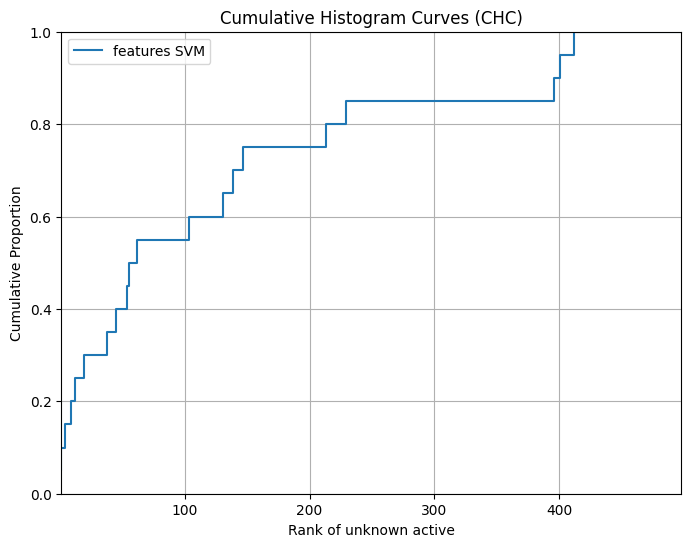

In [17]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))



# Create cumulative histograms for each method
hist_method, bin_edges = np.histogram(L, bins=np.arange(0, 500), density=True)
cumulative_hist_method = np.cumsum(hist_method)
# Plot cumulative histogram curves for each method
plt.plot(bin_edges[:-1], cumulative_hist_method, drawstyle='steps', label="features SVM")
auc_method = np.trapz(cumulative_hist_method, dx=1)
normalized_auc_method = auc_method / 500
print(f"AUC normalized : {normalized_auc_method:0.2f}" )

# Calculate percentage of ranks in the top 5% for each method
print("percentage of ranks in the top 5% for each method",cumulative_hist_method[24:26])
    
    


plt.xlabel('Rank of unknown active')
plt.ylabel('Cumulative Proportion')
plt.title('Cumulative Histogram Curves (CHC)')
plt.legend()
plt.grid(True)
plt.ylim(0, 1)
plt.xlim(1, max(bin_edges[:-1]))
plt.show()

# Cumulative Histogram Curves for the all datasets of the article (oct 2023)

In [56]:
df = pd.read_csv('/Users/gguichaoua/Dropbox/gwenn/these/Cluster/scaffold_hopping/scaffold_hopping_corrected.csv') 
path = "/Users/gguichaoua/Dropbox/gwenn/these/Cluster/scaffold_hopping/prediction_decoys_SVM_Features_pytorch/2023_10_16_all_article"
 

def f(id_t, num,path_decoys):
    
    if os.path.exists(path_decoys + "/decoys_" + id_t):
        os.chdir(path_decoys+ "/decoys_" + id_t)
        nom_t = 'predictions_smiles_{}_MorganFPrM_500_mM_3000.csv'.format(num)
        try:
            df_pred = pd.read_csv(nom_t)
            return (df_pred.index[df_pred["decoys"] == "smiles"+str(num)].tolist())[0]+1
        except:
            return 0
    else : 
        return 0

df['rank pred smiles_1_MorganFP_rM_500_mM_3000'] = list(map(lambda id_t: f(id_t, 0, path), df['id'])) 
df['rank pred smiles_2_MorganFP_rM_500_mM_3000'] = list(map(lambda id_t: f(id_t, 1, path), df['id'])) 

df_svm = df[df["rank pred smiles_1_MorganFP_rM_500_mM_3000"]!=0]  # on garde les 139 prédictions
df_svm

,id,smiles_1,smiles_2,uniprot_id,rank pred smiles_1_MorganFP_rM_500_mM_3000,rank pred smiles_2_MorganFP_rM_500_mM_3000
3,1c5q_1gi4,NC(N)c1cc2c(I)cccc2s1,NC(N)c1ccc2nc(-c3ccccc3O)[nH]c2c1,P00760,130,80
7,2f35_4ymb,N[C@@H](Cn1ccc(=O)n(Cc2ccccc2C(=O)O)c1=O)C(=O)O,CCC[C@@H]1CN[C@H](C(=O)O)[C@H]1c1cccc(C(=O)O)c1,P22756,1,7
8,3s2v_4ymb,N[C@@H](Cn1c(=O)n(Cc2ccsc2C(=O)O)c(=O)c2cscc21...,CCC[C@@H]1CN[C@H](C(=O)O)[C@H]1c1cccc(C(=O)O)c1,P22756,2,15
10,3prz_3qar,Cc1nc(N)c2cccc(C(=O)Nc3cc[nH]n3)c2n1,Cc1nc(N)nc(-n2c(Nc3cc[nH]n3)nc3ccccc32)n1,P48736,16,2
11,3zw3_4hvb,CC(=O)Nc1cn2cc(/C=C3\SC(=O)N=C3O)ccc2n1,Cc1ccc(-c2ccc3ncc4c(c3n2)n(C2CCN(C(=O)[C@H](C)...,P48736,93,1
...,...,...,...,...,...,...
225,5a0a_5a8y,CC(=O)C1=C(C)N(c2cccc(C(F)(F)F)c2)C(=O)N[C@@H]...,COC(=O)Nc1nc2n(n1)[C@H](c1ccc(C#N)cc1)C(C#N)=C...,P08246,21,19
226,3miy_3qgw,CCN(CC)CCNC(=O)C1=C(C)NC(\C=C2/C(=O)NC3=C2C=C(...,O=C(Nc1cc(-c2ccncc2)c[nH]c1=O)c1ccccc1,Q08881,6,209
228,5n4t_5y6e,C[C@H](CS)C(=O)N[C@@H](Cc1c[nH]c2ccccc12)C(=O)O,C[C@H](CS)C(=O)N[C@@H](C(=O)O)c1ccc(O)cc1,Q9K2N0,122,2
229,5y6e_6hf5,C[C@H](CS)C(=O)N[C@@H](C(=O)O)c1ccc(O)cc1,O=C(O)c1ncsc1NS(=O)(=O)c1cccnc1,Q9K2N0,23,386


AUC normalized : 0.85
percentage of ranks in the top 5% for each method [0.51079137 0.51438849]


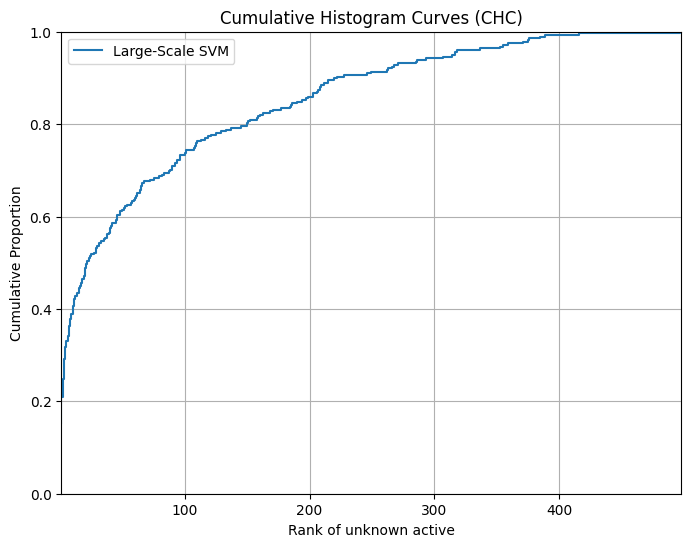

In [57]:
L_largeSVM = list(np.concatenate((np.array(df_svm["rank pred smiles_1_MorganFP_rM_500_mM_3000"]), np.array(df_svm["rank pred smiles_2_MorganFP_rM_500_mM_3000"]))))
L = []
L.append(L_largeSVM)

import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Create cumulative histograms for each method
hist_method, bin_edges = np.histogram(L, bins=np.arange(0, 500), density=True)
cumulative_hist_method = np.cumsum(hist_method)
# Plot cumulative histogram curves for each method
plt.plot(bin_edges[:-1], cumulative_hist_method, drawstyle='steps', label="Large-Scale SVM")
auc_method = np.trapz(cumulative_hist_method, dx=1)
normalized_auc_method = auc_method / 500
print(f"AUC normalized : {normalized_auc_method:0.2f}" )

# Calculate percentage of ranks in the top 5% for each method
print("percentage of ranks in the top 5% for each method",cumulative_hist_method[24:26])

plt.xlabel('Rank of unknown active')
plt.ylabel('Cumulative Proportion')
plt.title('Cumulative Histogram Curves (CHC)')
plt.legend()
plt.grid(True)
plt.ylim(0, 1)
plt.xlim(1, max(bin_edges[:-1]))
plt.show()

In [58]:
# on rajoute les prédictions de l'article (chemo) 
path_article = "/Users/gguichaoua/Dropbox/gwenn/these/chemogenomique/2023_10_16 scaffold hopping/files_article/"
def f_1(id_t, num):
    
        nom_t = path_article + 'ranking_{}.csv'.format(id_t)
        try:
            df_pred = pd.read_csv(nom_t)
            return int(df_pred.loc[(num+1)%2, "chemogenomics|ref_"+str(num)])
        except:
            return 0

df_svm['rank pred smiles_1_SVM_Drugbank'] = list(map(lambda id_t: f_1(id_t, 0), df_svm['id'])) 
df_svm['rank pred smiles_2_SVM_Drugbank'] = list(map(lambda id_t: f_1(id_t, 1), df_svm['id'])) 
df_svm

/var/folders/zg/y03kdtc553xg5q1ct59rj44c0000gn/T/ipykernel_94020/2720686493.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_svm['rank pred smiles_1_SVM_Drugbank'] = list(map(lambda id_t: f_1(id_t, 0), df_svm['id']))
/var/folders/zg/y03kdtc553xg5q1ct59rj44c0000gn/T/ipykernel_94020/2720686493.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_svm['rank pred smiles_2_SVM_Drugbank'] = list(map(lambda id_t: f_1(id_t, 1), df_svm['id']))


,id,smiles_1,smiles_2,uniprot_id,rank pred smiles_1_MorganFP_rM_500_mM_3000,rank pred smiles_2_MorganFP_rM_500_mM_3000,rank pred smiles_1_SVM_Drugbank,rank pred smiles_2_SVM_Drugbank
3,1c5q_1gi4,NC(N)c1cc2c(I)cccc2s1,NC(N)c1ccc2nc(-c3ccccc3O)[nH]c2c1,P00760,130,80,7,2
7,2f35_4ymb,N[C@@H](Cn1ccc(=O)n(Cc2ccccc2C(=O)O)c1=O)C(=O)O,CCC[C@@H]1CN[C@H](C(=O)O)[C@H]1c1cccc(C(=O)O)c1,P22756,1,7,95,31
8,3s2v_4ymb,N[C@@H](Cn1c(=O)n(Cc2ccsc2C(=O)O)c(=O)c2cscc21...,CCC[C@@H]1CN[C@H](C(=O)O)[C@H]1c1cccc(C(=O)O)c1,P22756,2,15,110,76
10,3prz_3qar,Cc1nc(N)c2cccc(C(=O)Nc3cc[nH]n3)c2n1,Cc1nc(N)nc(-n2c(Nc3cc[nH]n3)nc3ccccc32)n1,P48736,16,2,1,1
11,3zw3_4hvb,CC(=O)Nc1cn2cc(/C=C3\SC(=O)N=C3O)ccc2n1,Cc1ccc(-c2ccc3ncc4c(c3n2)n(C2CCN(C(=O)[C@H](C)...,P48736,93,1,224,128
...,...,...,...,...,...,...,...,...
225,5a0a_5a8y,CC(=O)C1=C(C)N(c2cccc(C(F)(F)F)c2)C(=O)N[C@@H]...,COC(=O)Nc1nc2n(n1)[C@H](c1ccc(C#N)cc1)C(C#N)=C...,P08246,21,19,4,11
226,3miy_3qgw,CCN(CC)CCNC(=O)C1=C(C)NC(\C=C2/C(=O)NC3=C2C=C(...,O=C(Nc1cc(-c2ccncc2)c[nH]c1=O)c1ccccc1,Q08881,6,209,346,91
228,5n4t_5y6e,C[C@H](CS)C(=O)N[C@@H](Cc1c[nH]c2ccccc12)C(=O)O,C[C@H](CS)C(=O)N[C@@H](C(=O)O)c1ccc(O)cc1,Q9K2N0,122,2,2,1
229,5y6e_6hf5,C[C@H](CS)C(=O)N[C@@H](C(=O)O)c1ccc(O)cc1,O=C(O)c1ncsc1NS(=O)(=O)c1cccnc1,Q9K2N0,23,386,328,375


In [59]:
# on rajoute les prédictions de l'article (chemo) 
path_article = "/Users/gguichaoua/Dropbox/gwenn/these/chemogenomique/2023_10_16 scaffold hopping/files_article/"
def f_2(id_t, num):
    
        nom_t = path_article + 'ranking_{}.csv'.format(id_t)
        try:
            df_pred = pd.read_csv(nom_t)
            return int(df_pred.loc[(num+1)%2, "3D_pharmacophore_generated_conformers|ref_"+str(num)])
        except:
            return 0

df_svm['rank pred smiles_1_3D_pharmacophore_generated_conformers'] = list(map(lambda id_t: f_2(id_t, 0), df_svm['id'])) 
df_svm['rank pred smiles_2_3D_pharmacophore_generated_conformers'] = list(map(lambda id_t: f_2(id_t, 1), df_svm['id'])) 
df_svm

/var/folders/zg/y03kdtc553xg5q1ct59rj44c0000gn/T/ipykernel_94020/1987858891.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_svm['rank pred smiles_1_3D_pharmacophore_generated_conformers'] = list(map(lambda id_t: f_2(id_t, 0), df_svm['id']))
/var/folders/zg/y03kdtc553xg5q1ct59rj44c0000gn/T/ipykernel_94020/1987858891.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_svm['rank pred smiles_2_3D_pharmacophore_generated_conformers'] = list(map(lambda id_t: f_2(id_t, 1), df_svm['id']))


,id,smiles_1,smiles_2,uniprot_id,rank pred smiles_1_MorganFP_rM_500_mM_3000,rank pred smiles_2_MorganFP_rM_500_mM_3000,rank pred smiles_1_SVM_Drugbank,rank pred smiles_2_SVM_Drugbank,rank pred smiles_1_3D_pharmacophore_generated_conformers,rank pred smiles_2_3D_pharmacophore_generated_conformers
3,1c5q_1gi4,NC(N)c1cc2c(I)cccc2s1,NC(N)c1ccc2nc(-c3ccccc3O)[nH]c2c1,P00760,130,80,7,2,3,2
7,2f35_4ymb,N[C@@H](Cn1ccc(=O)n(Cc2ccccc2C(=O)O)c1=O)C(=O)O,CCC[C@@H]1CN[C@H](C(=O)O)[C@H]1c1cccc(C(=O)O)c1,P22756,1,7,95,31,34,41
8,3s2v_4ymb,N[C@@H](Cn1c(=O)n(Cc2ccsc2C(=O)O)c(=O)c2cscc21...,CCC[C@@H]1CN[C@H](C(=O)O)[C@H]1c1cccc(C(=O)O)c1,P22756,2,15,110,76,50,118
10,3prz_3qar,Cc1nc(N)c2cccc(C(=O)Nc3cc[nH]n3)c2n1,Cc1nc(N)nc(-n2c(Nc3cc[nH]n3)nc3ccccc32)n1,P48736,16,2,1,1,2,1
11,3zw3_4hvb,CC(=O)Nc1cn2cc(/C=C3\SC(=O)N=C3O)ccc2n1,Cc1ccc(-c2ccc3ncc4c(c3n2)n(C2CCN(C(=O)[C@H](C)...,P48736,93,1,224,128,399,368
...,...,...,...,...,...,...,...,...,...,...
225,5a0a_5a8y,CC(=O)C1=C(C)N(c2cccc(C(F)(F)F)c2)C(=O)N[C@@H]...,COC(=O)Nc1nc2n(n1)[C@H](c1ccc(C#N)cc1)C(C#N)=C...,P08246,21,19,4,11,12,1
226,3miy_3qgw,CCN(CC)CCNC(=O)C1=C(C)NC(\C=C2/C(=O)NC3=C2C=C(...,O=C(Nc1cc(-c2ccncc2)c[nH]c1=O)c1ccccc1,Q08881,6,209,346,91,472,490
228,5n4t_5y6e,C[C@H](CS)C(=O)N[C@@H](Cc1c[nH]c2ccccc12)C(=O)O,C[C@H](CS)C(=O)N[C@@H](C(=O)O)c1ccc(O)cc1,Q9K2N0,122,2,2,1,50,53
229,5y6e_6hf5,C[C@H](CS)C(=O)N[C@@H](C(=O)O)c1ccc(O)cc1,O=C(O)c1ncsc1NS(=O)(=O)c1cccnc1,Q9K2N0,23,386,328,375,329,222


AUC normalized for kernel Large-scale SVM on C: 0.85
[0.51079137 0.51438849]
AUC normalized for kernel SVM on Drugban: 0.76
[0.33453237 0.35251799]
AUC normalized for kernel 3D_pharmacophore_generated_conformer: 0.64
[0.19784173 0.20863309]


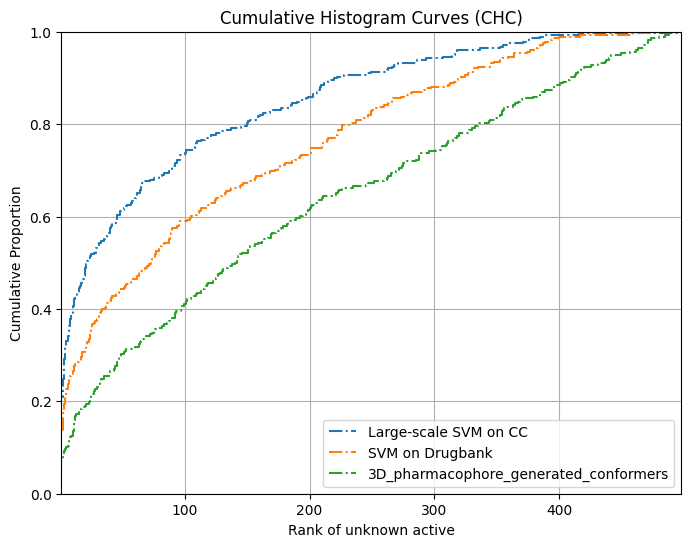

In [61]:
L_chemo = np.concatenate((np.array(df_svm["rank pred smiles_1_SVM_Drugbank"]), np.array(df_svm["rank pred smiles_2_SVM_Drugbank"])))
L_3D = np.concatenate((np.array(df_svm["rank pred smiles_1_3D_pharmacophore_generated_conformers"]), np.array(df_svm["rank pred smiles_2_3D_pharmacophore_generated_conformers"])))

L.append(L_chemo)
L.append(L_3D)

import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
kernel_type_list = ["Large-scale SVM on CC","SVM on Drugbank","3D_pharmacophore_generated_conformers" ]


for i in range(len(L))  : 
    # Create cumulative histograms for each method
    hist_method, bin_edges = np.histogram(L[i], bins=np.arange(0, 500), density=True)
    cumulative_hist_method = np.cumsum(hist_method)
    # Plot cumulative histogram curves for each method
    if i<4:
        plt.plot(bin_edges[:-1], cumulative_hist_method, drawstyle='steps', label=kernel_type_list[i], linestyle = "-.")
    else : 
        plt.plot(bin_edges[:-1], cumulative_hist_method, drawstyle='steps', label=kernel_type_list[i],  linewidth = 3)
    auc_method = np.trapz(cumulative_hist_method, dx=1)
    normalized_auc_method = auc_method / 500
    print(f"AUC normalized for kernel {kernel_type_list[i][:-1]}: {normalized_auc_method:0.2f}" )

    # Calculate percentage of ranks in the top 5% for each method
    print(cumulative_hist_method[24:26])
    
    


plt.xlabel('Rank of unknown active')
plt.ylabel('Cumulative Proportion')
plt.title('Cumulative Histogram Curves (CHC)')
plt.legend()
plt.grid(True)
plt.ylim(0, 1)
plt.xlim(1, max(bin_edges[:-1]))
plt.show()